 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csv_path = Path('Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_csv_path, index_col='Date', infer_datetime_format=True, parse_dates=True)

# Making sure the index are sorted as expected (ascending) for dates
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
#curious to see how many lines we have
whale_df.shape

(1060, 4)

In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_csv_path = Path('Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_csv_path, index_col='Date', infer_datetime_format=True, parse_dates=True)

# Making sure the index are sorted as expected (ascending) for dates
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_csv_path = Path('Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_csv_path, index_col='Date', infer_datetime_format=True, parse_dates=True)

# Making sure the index are sorted as expected (ascending) for dates
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].replace({'\$':''}, regex=True).astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_daily_returns =sp500_df.pct_change().dropna()
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Check and drop nulls if needed
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns=['SP500']
sp500_daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

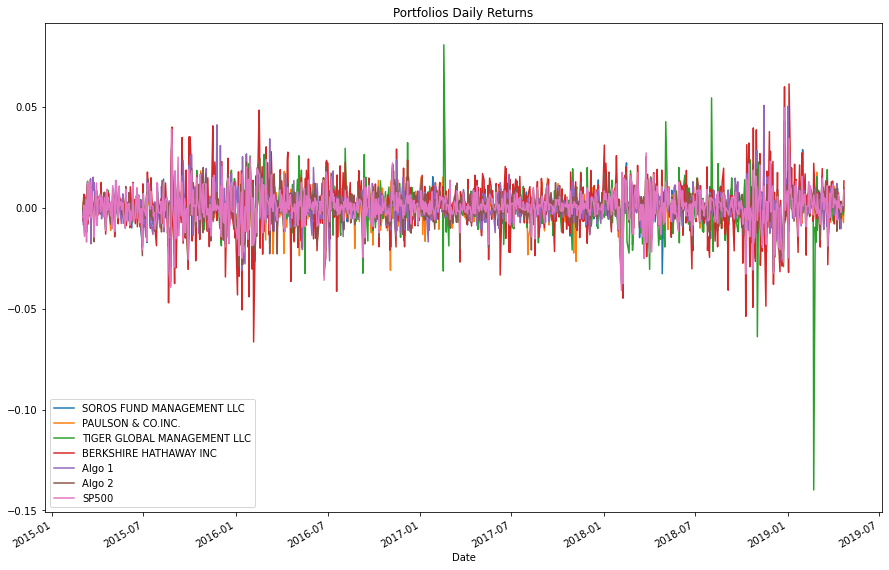

In [16]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(15,10), title= "Portfolios Daily Returns");

#### Calculate and Plot cumulative returns.

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_rtn_pfs = (1 + combined_df).cumprod()
cumulative_rtn_pfs.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


<AxesSubplot:title={'center':'Cumulative Returns by Portfolios'}, xlabel='Date'>

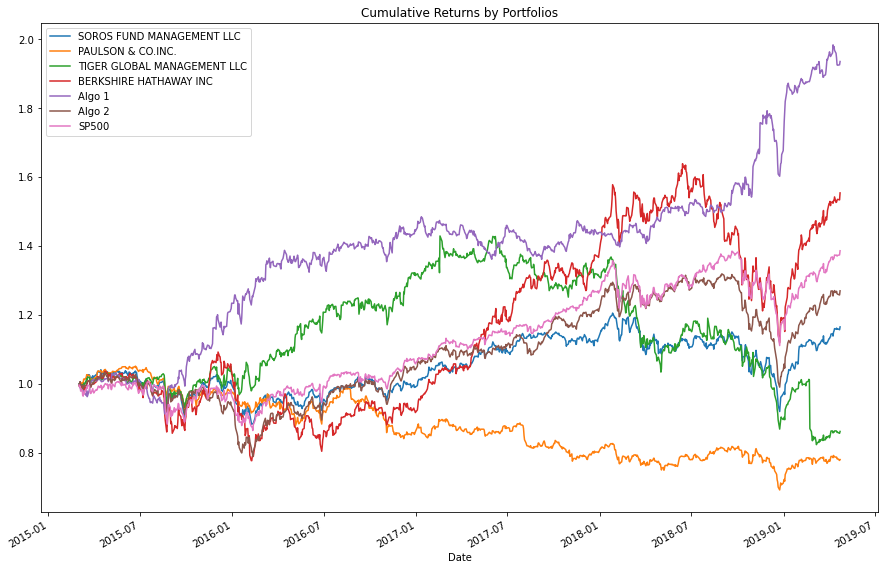

In [18]:
# Plot cumulative returns
cumulative_rtn_pfs.plot(figsize=(15,10), title= "Cumulative Returns by Portfolios")

We can see that two portfolios outperform the "Market" = SP500, the portfolio Algo1 and Berkshire Hathaway.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

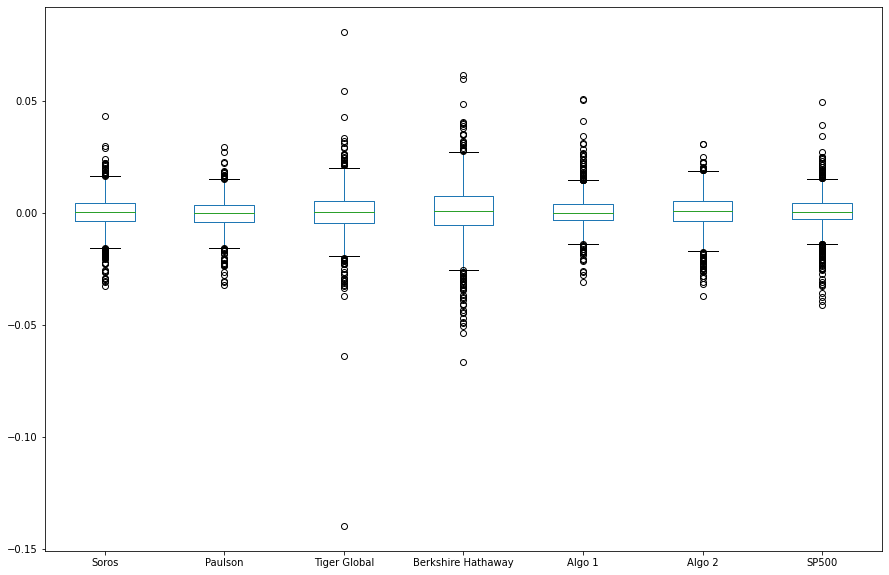

In [19]:
# Box plot to visually show risk
    #renaming(shortening) the portfolios to fit the axis while reading the chart
combined_df.columns=['Soros', 'Paulson', 'Tiger Global', 'Berkshire Hathaway', 'Algo 1', 'Algo 2', 'SP500']
combined_df.plot.box(figsize=(15,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std.sort_values(ascending= False, inplace=True)
daily_std

Berkshire Hathaway    0.012919
Tiger Global          0.010894
SP500                 0.008554
Algo 2                0.008342
Soros                 0.007895
Algo 1                0.007620
Paulson               0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
daily_std_SP500 = combined_df['SP500'].std()
daily_std_SP500

# Determine which portfolios are riskier than the S&P 500

for idx, std in daily_std.items():
    if std > daily_std['SP500']:
        print (f'{idx} : std {round(std,4)}')

# or could have used the boolean : daily_std > daily_std_SP500
        

Berkshire Hathaway : std 0.0129
Tiger Global : std 0.0109


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.sort_values(ascending=False, inplace=True)
annualized_std

Berkshire Hathaway    0.205077
Tiger Global          0.172936
SP500                 0.135786
Algo 2                0.132430
Soros                 0.125335
Algo 1                0.120967
Paulson               0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling STD (21-day)'}, xlabel='Date'>

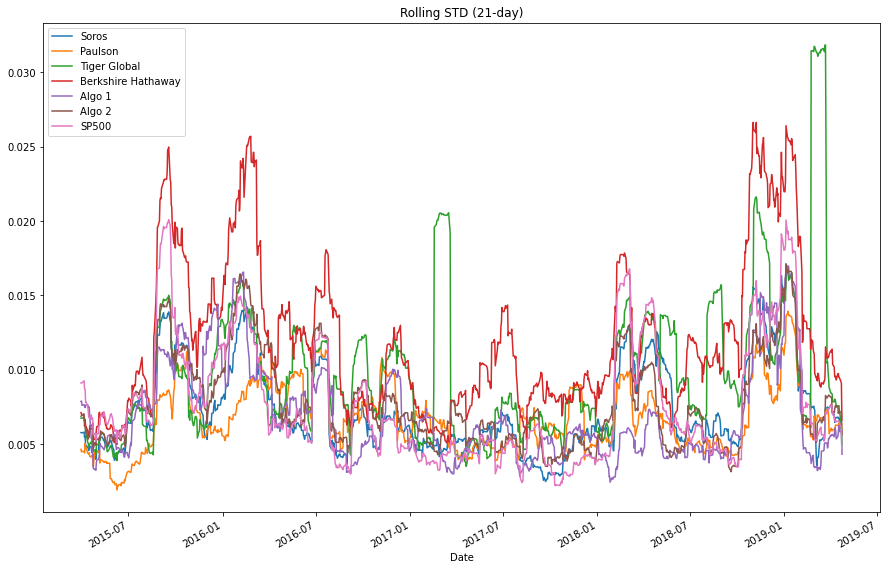

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_combined_pf = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std_combined_pf.plot(figsize=(15,10), title='Rolling STD (21-day)')

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
correlation_pfs = combined_df.corr()
correlation_pfs

,Soros,Paulson,Tiger Global,Berkshire Hathaway,Algo 1,Algo 2,SP500
Soros,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
Paulson,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
Tiger Global,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
Berkshire Hathaway,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

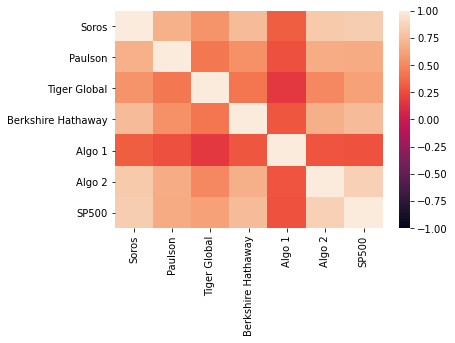

In [25]:
# Display de correlation matrix
sns.heatmap(correlation_pfs, vmin=-1, vmax=1)

Portfolios Soros and Algo2 are the most correlated strategies to the SP500.

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-day Beta trend for Algo 1'}, xlabel='Date'>

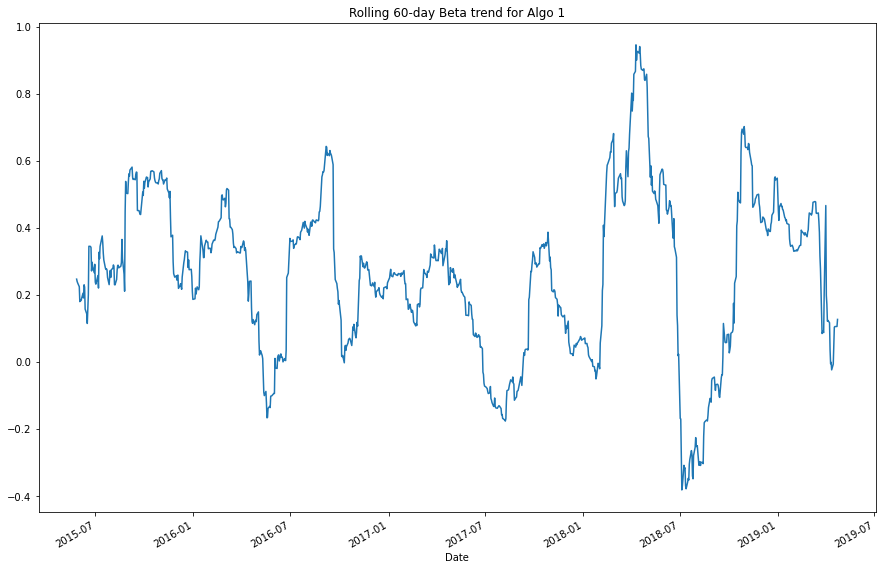

In [26]:
#calculate the 60-day rolling Beta
# I picked the portfolio "Algo 1" to calculate the Beta

    #calculate the 60-day rolling covariance
rolling_cov_algo1 = combined_df['Algo 1'].rolling(window=60).cov(combined_df['SP500'])

    #calulate the 60-day rolling variance
rolling_var_algo1 = combined_df['Algo 1'].rolling(window=60).var() 

# Plot beta trend
rolling_beta_algo1 = rolling_cov_algo1/rolling_var_algo1
rolling_beta_algo1.plot(figsize=(15,10), title= 'Rolling 60-day Beta trend for Algo 1')

<AxesSubplot:title={'center':'Rolling 60-day Beta trend for all portfolios'}, xlabel='Date'>

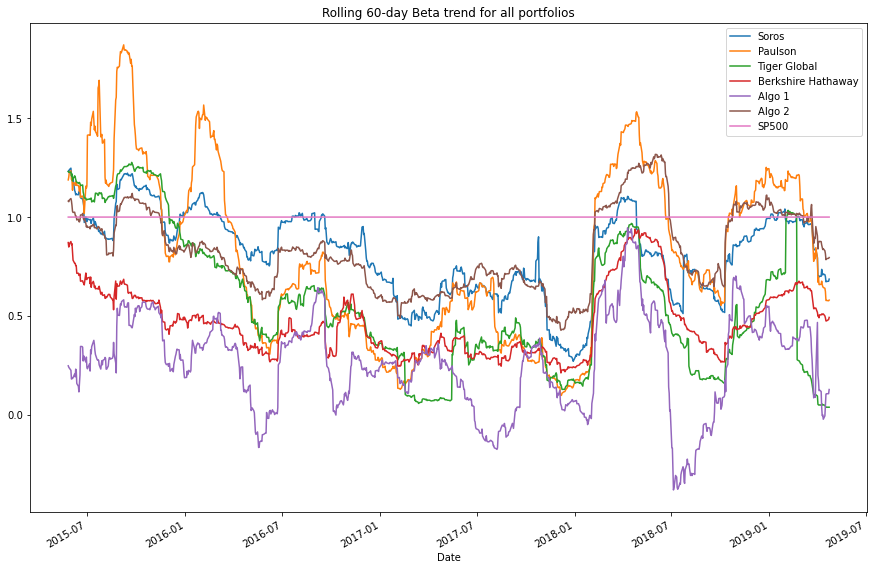

In [27]:
# Calculating and plotting the 60-day rolling Beta for all portfolios

    #calculate the 60-day rolling covariance
rolling_cov_combined_pfs = combined_df.rolling(window=60).cov(combined_df['SP500'])
    #calulate the 60-day rolling variance
rolling_var_combined_pfs = combined_df.rolling(window=60).var() 

# Plot beta trend
rolling_beta_combined_pfs = rolling_cov_combined_pfs/rolling_var_combined_pfs
rolling_beta_combined_pfs.plot(figsize=(15,10), title= 'Rolling 60-day Beta trend for all portfolios')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

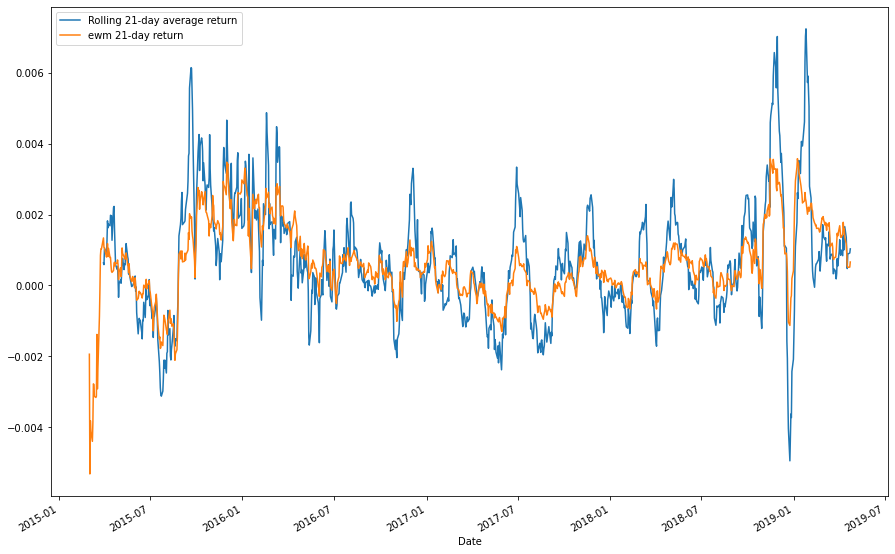

In [28]:
# Use `ewm` to calculate the rolling window
# I picked the portfolio "Algo 1" only to be able to compare in teh same chart both the regular rolling return Vs ewm
rolling_rt_algo1 = combined_df['Algo 1'].rolling(window=21).mean()
ax = rolling_rt_algo1.plot()

ewm_21 = combined_df['Algo 1'].ewm(halflife=21).mean()
ewm_21.plot(figsize=(15,10), ax=ax)
ax.legend(['Rolling 21-day average return', 'ewm 21-day return'])

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_df.mean()*252)/(annualized_std)
sharpe_ratio.sort_values(ascending=False, inplace=True)
sharpe_ratio

Algo 1                1.378648
SP500                 0.648267
Berkshire Hathaway    0.621810
Algo 2                0.501364
Soros                 0.356417
Tiger Global         -0.121060
Paulson              -0.483570
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratio'}>

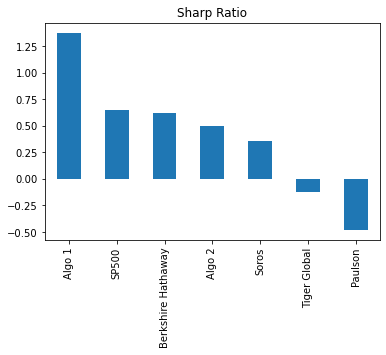

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title= 'Sharp Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

After completing our analysis, we can see that the portfolio "Algo 1" outperformed the market (S&P 500) but also outperfomed all the other portfolios by a significant margin. 
The "Algo 2" portfolio ended up in the middle of the pack, slightly underprofming the market but still outperfoming three out of the four Whale Portfolios. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [31]:
# Reading data from 1st stock
# Reading into the file while organizing the index and dropping useless columns
goog_csv_path = Path('Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_csv_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
goog_df.drop(columns=['Symbol'], inplace=True)

# Making sure we have the index correctly sorted (ascending)
goog_df.sort_index(inplace=True)
goog_df.columns=['Google']
goog_df.head()

,Google
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [32]:
# Reading data from 2nd stock
# Reading into the file while organizing the index and dropping useless columns
aapl_csv_path = Path('Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_csv_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapl_df.drop(columns=['Symbol'], inplace=True)

# Making sure we have the index correctly sorted (ascending)
aapl_df.sort_index(inplace=True)
aapl_df.columns=['Apple']
aapl_df.head()

,Apple
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [33]:
# Reading data from 3rd stock
# Reading into the file while organizing the index and dropping useless columns
cost_csv_path = Path('Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_csv_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost_df.drop(columns=['Symbol'], inplace=True)

# Making sure we have the index correctly sorted (ascending)
cost_df.sort_index(inplace=True)
cost_df.columns=['Costco']
cost_df.head()

,Costco
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [34]:
# Checking for Nulls
aapl_df.isnull().sum()

Apple    0
dtype: int64

In [35]:
# Checking for Nulls
goog_df.isnull().sum()

Google    0
dtype: int64

In [36]:
# Checking for Nulls
cost_df.isnull().sum()

Costco    0
dtype: int64

In [37]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([goog_df, aapl_df, cost_df], axis='columns', join='inner')
my_portfolio.head()

,Google,Apple,Costco
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [38]:
# Reset Date index
# => not need as i already did it above
# Renaming index name to "Date"
my_portfolio.index.rename('Date', inplace=True)
my_portfolio.head()

,Google,Apple,Costco
Date,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [39]:
# Reorganize portfolio data by having a column per symbol
# => no need as i already did it above
# i.e I dropped the "symbol" column at the beginning hence no need to use the pivot table to re-organize the data

In [40]:
# Calculate daily returns
# mypf = my portfolio
mypf_daily_returns = my_portfolio.pct_change().dropna()

# Display sample data
mypf_daily_returns.head()

,Google,Apple,Costco
Date,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_return = mypf_daily_returns.dot(weights)

# Display sample data
my_portfolio_return.head()

Date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [42]:
# Join your returns DataFrame to the original returns DataFrame
new_combined_df = pd.concat([combined_df, my_portfolio_return], axis='columns', join='inner')
new_combined_df.head()

,Soros,Paulson,Tiger Global,Berkshire Hathaway,Algo 1,Algo 2,SP500,0
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [43]:
# Add a name to the new column we just added
new_combined_df.rename(columns={0:'My Portfolio'}, inplace=True)

# Only compare dates where return data exists for all the stocks (drop NaNs)
new_combined_df.isnull().sum()

Soros                 0
Paulson               0
Tiger Global          0
Berkshire Hathaway    0
Algo 1                0
Algo 2                0
SP500                 0
My Portfolio          0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the new daily `std`
new_daily_std = new_combined_df.std()
new_daily_std.sort_values(ascending=False, inplace=True)
new_daily_std

Berkshire Hathaway    0.015569
Tiger Global          0.014648
My Portfolio          0.013323
SP500                 0.009578
Soros                 0.009240
Algo 2                0.008791
Algo 1                0.008423
Paulson               0.007353
dtype: float64

In [45]:
# Calculate the annualized `std`
new_annualized_std = new_combined_df.std() * np.sqrt(252)
new_annualized_std = new_daily_std * np.sqrt(252)
new_annualized_std.sort_values(ascending=False, inplace=True)
new_annualized_std

Berkshire Hathaway    0.247155
Tiger Global          0.232531
My Portfolio          0.211496
SP500                 0.152054
Soros                 0.146675
Algo 2                0.139556
Algo 1                0.133704
Paulson               0.116732
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling STD (21-day)'}, xlabel='Date'>

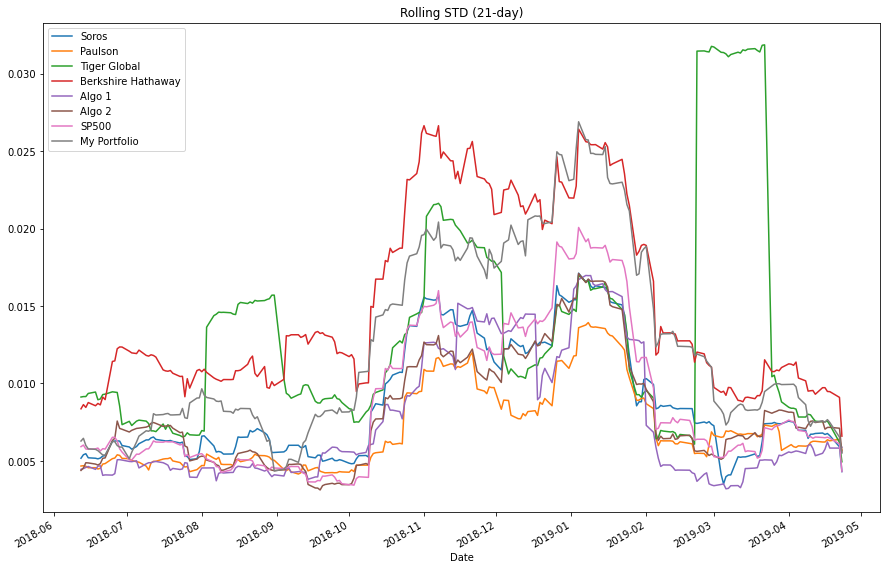

In [46]:
# Calculate rolling standard deviation
new_rolling_21std = new_combined_df.rolling(window=21).std()

# Plot rolling standard deviation
new_rolling_21std.plot(figsize=(15,10), title='Rolling STD (21-day)')

### Calculate and plot the correlation

In [47]:
# Calculate and plot the correlation
new_correlation_pfs = new_combined_df.corr()
new_correlation_pfs

,Soros,Paulson,Tiger Global,Berkshire Hathaway,Algo 1,Algo 2,SP500,My Portfolio
Soros,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
Paulson,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
Tiger Global,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
Berkshire Hathaway,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
SP500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
My Portfolio,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


<AxesSubplot:>

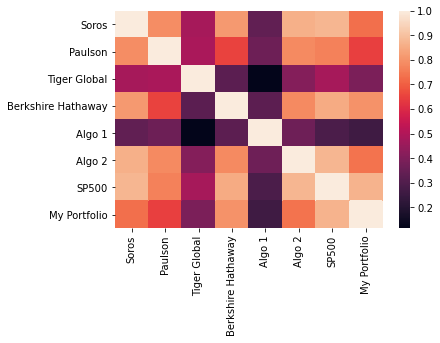

In [48]:
sns.heatmap(new_correlation_pfs)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

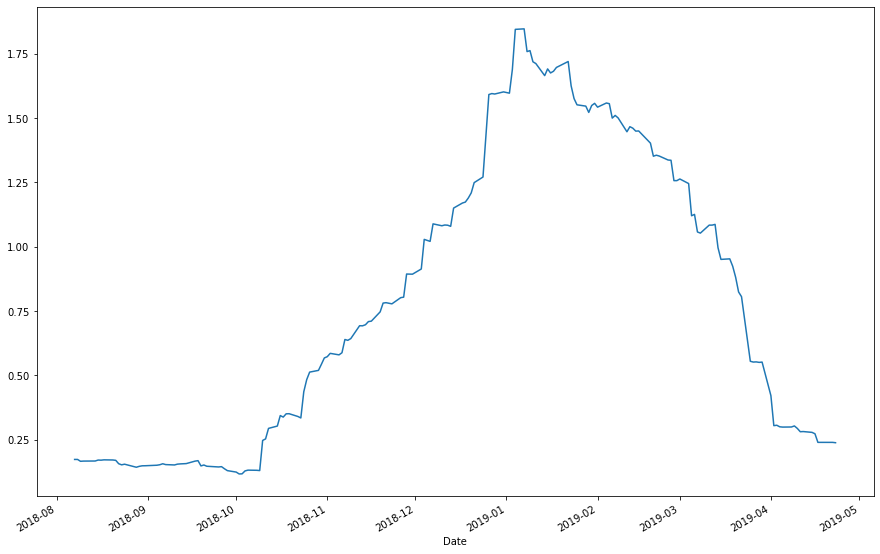

In [49]:
# Calculate and plot Beta
    #calculate the covariance for 'My Portfolio'
rolling_cov_mypf = new_combined_df['My Portfolio'].rolling(window=60).cov(new_combined_df['SP500'])

    #calculate the variance for 'My Portfolio'
rolling_var_mypf = new_combined_df['My Portfolio'].var()

    # Calculate the Beta for "My Portfolio"
rolling_beta_mypf = rolling_cov_mypf / rolling_var_mypf

# plot Beta
rolling_beta_mypf.plot(figsize=(15, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Calculate Annualzied Sharpe Ratios
new_anuallized_std = new_daily_std.std()*np.sqrt(252)
new_sharpe = (new_combined_df.mean()*252) / (new_annualized_std)
new_sharpe.sort_values(ascending=False, inplace=True)
new_sharpe

Algo 1                2.035665
My Portfolio          0.933123
SP500                 0.584820
Soros                 0.430713
Paulson               0.258738
Berkshire Hathaway    0.159756
Algo 2                0.080607
Tiger Global         -1.034216
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratio'}>

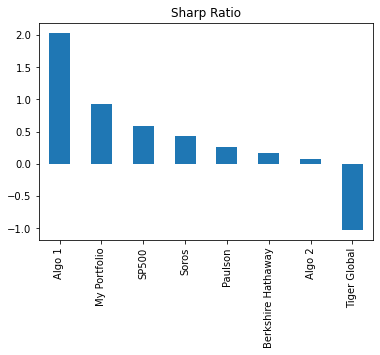

In [51]:
# Visualize the sharpe ratios as a bar plot
new_sharpe.plot(kind='bar', title= 'Sharp Ratio')

### How does your portfolio do?

Write your answer here!

My portfolio performed pretty well in comparison to the other strategies. It does outperform the benchmark/Markets (S&P500) and delivers the second best sharpe ratio behind the "Algo 1" strategy. 
But it is interesting to note that "My Portfolio" shows greater annualized standard deviation than SP500. Therefore we can conclude thta "My Portfolio" is overall more volatile than the markets and also has a 60-days rolling Beta that went as high as 1.75 over the period which is a very high Beta. 